### __音声データの読み書き・パラメータ取得・波形データの可視化__

#### __準備__

In [1]:
!pip install pyroomacoustics --quiet

     |████████████████████████████████| 1.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import IPython
import pyroomacoustics as pra

# サンプルデータのダウンロード
# 男性話者aewと女性話者axb
pra.datasets.CMUArcticCorpus(download=True, speaker=["aew", "axb"])

file_name="CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

Download http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2 into ./CMU_ARCTIC ...
Download http://festvox.org/cmu_arctic/packed/cmu_us_axb_arctic.tar.bz2 into ./CMU_ARCTIC ...


#### __再生__

In [3]:
# 再生

IPython.display.Audio(file_name)

#### __パラメータ取得__

In [4]:
# ファイルの読み込み

wav=wave.open(file_name)
wav

In [5]:
# データ型の確認

type(wav)

wave.Wave_read

In [6]:
# サンプリング周波数[Hz]
# 1秒間に何回データを取得するか

sampling_rate = wav.getframerate()
sampling_rate

16000

In [7]:
# サンプル数
# サンプリング周波数で割れば時間

n_sample = wav.getnframes()
n_sample

62081

In [8]:
# サンプルサイズ[Byte]
# 音声データ1サンプルあたりのバイト数(1バイト=8ビット)
# ビット深度とも言う

sample_size = wav.getsampwidth()
sample_size

2

In [9]:
# チャンネル数
# 何本のマイクで収録したか
# モノラルなら1， ステレオなら2

wav.getnchannels()

1

In [10]:
# パラメータ
# タプルで返る

wav.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62081, comptype='NONE', compname='not compressed')

In [11]:
# 録音時間[s] ＝ フレーム数/サンプリングレート

duration = wav.getnframes() / wav.getframerate()
duration

3.8800625

#### __波形データの可視化__

In [12]:
# 指定したフレーム数ぶん、データを読み込み
# 単に「wav」を出力してもインスタンスの情報しか返ってこないので、
# 具体的な音声データを取得する時はreadframesを使う

data = wav.readframes(wav.getnframes())

# バイナリデータ
data

b'\x1d\x00"\x00&\x00&\x00$\x00)\x00-\x00(\x00-\x00+\x00*\x00/\x00.\x00.\x000\x006\x008\x001\x000\x005\x005\x004\x002\x00.\x00)\x00 \x00\x1c\x00\x16\x00\x11\x00\n\x00\x03\x00\x01\x00\xfb\xff\xf3\xff\xee\xff\xe5\xff\xdf\xff\xd5\xff\xc7\xff\xbf\xff\xb2\xff\xab\xff\xa7\xff\x9e\xff\x9c\xff\x98\xff\x9a\xff\x9d\xff\xa1\xff\xa6\xff\xa8\xff\xb4\xff\xba\xff\xbd\xff\xc0\xff\xc6\xff\xcb\xff\xc8\xff\xcd\xff\xd3\xff\xd4\xff\xd4\xff\xd5\xff\xd5\xff\xd6\xff\xd7\xff\xd3\xff\xd5\xff\xd5\xff\xcf\xff\xc7\xff\xbc\xff\xbe\xff\xc9\xff\xd8\xff\xe9\xff\xf2\xff\xf9\xff\xfa\xff\xfe\xff\x05\x00\n\x00\x06\x00\x04\x00\x04\x00\x05\x00\x02\x00\xfa\xff\xfd\xff\xfb\xff\xf0\xff\xec\xff\xe9\xff\xe8\xff\xe6\xff\xe3\xff\xe8\xff\xeb\xff\xed\xff\xee\xff\xef\xff\xf2\xff\xf2\xff\xf5\xff\xf9\xff\xfb\xff\xfc\xff\xfc\xff\x02\x00\x08\x00\x06\x00\x0b\x00\x13\x00!\x00.\x00=\x00M\x00]\x00g\x00j\x00p\x00i\x00j\x00e\x00p\x00G\x00\t\x00\t\x00\n\x00\x06\x00\x00\x00\xfe\xff\xf3\xff\xef\xff\xec\xff\xe9\xff\xe9\xff\xe5\xff\xe7\xff\xe3\xff\x

In [13]:
# waveファイルを閉じる

wav.close()

In [14]:
# バイナリデータを2バイト(16ビット)の数値列に変換

data = np.frombuffer(data, dtype=np.int16)
data

array([29, 34, 38, ..., -3, -1,  0], dtype=int16)

1サンプルあたり2バイト(16ビット)で表されているので、表現可能な階調は2の16乗ある。

ただし、正と負があるため、正・負それぞれの領域は、その1/2階調の細かさまで表現できる。

これを最大値として正規化する。

int16型なので範囲が [-2^16/2, 2^16/2] すなわち [-32768, 32768] であるという計算を自動で行うのが`np.iinfo()`関数。

- int ＋ info → `iinfo()`

- float ＋ info → `finfo()`

In [15]:
data = data / np.iinfo(np.int16).max
# data = data / (2**(8 * sample_size) / 2) も可

data

array([ 8.85036775e-04,  1.03762932e-03,  1.15970336e-03, ...,
       -9.15555284e-05, -3.05185095e-05,  0.00000000e+00])

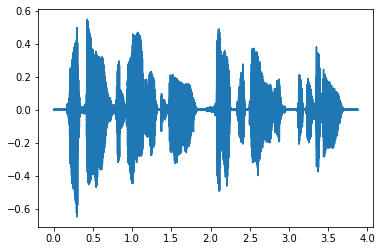

In [16]:
x = np.arange(n_sample) / sampling_rate # x軸

plt.plot(x, data)
plt.show()

#### __ホワイトノイズの書き込み__

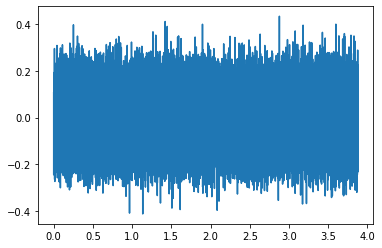

In [17]:
sampling_rate = 16000 # サンプリング周波数

data = np.random.normal(scale=0.1, size=n_sample) # 乱数

plt.plot(x, data)
plt.show()

In [18]:
data *= np.iinfo(np.int16).max # 2バイトにスケール調整(音量調整)
data = data.astype(np.int16) # 2バイトに型変換

data

array([ 3496, -1275, -4810, ...,  4235,  1771, -1511], dtype=int16)

In [19]:
output_file_name = "output.wav"
output = wave.open(output_file_name, "w")

# パラメータ設定
output.setnchannels(1) 
output.setsampwidth(2)
output.setframerate(sampling_rate)

# データの書き込み
output.writeframes(data)

output.close()

In [20]:
# 再生

IPython.display.Audio(output_file_name)